In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [36]:
dados = pd.read_csv("K-means/Admission_Predict.csv")
dados.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Selecionando as colunas

In [56]:
# Armazenando na variavel X
X = dados.iloc[:, 1:8].values
X

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

###  Iniciando o K-means utilizando 3 cluster

In [43]:
kmeans = KMeans(n_clusters = 4, init = 'random')

In [44]:
# executamos a função fit() para executar o algoritmo e agrupar os dados
"""
Após executar o método o Scikit-Learn retorna o objeto 
com os seus valores de cada atributo conforme especificamos ou com seus valores padrão.
"""
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
#  verificando os centroides 
kmeans.cluster_centers_

array([[3.23230159e+02, 1.09976190e+02, 3.51587302e+00, 3.73015873e+00,
        3.67857143e+00, 8.85182540e+00, 8.01587302e-01],
       [3.33920635e+02, 1.16523810e+02, 4.47619048e+00, 4.47619048e+00,
        4.35714286e+00, 9.44190476e+00, 9.68253968e-01],
       [3.12078571e+02, 1.04800000e+02, 2.57142857e+00, 3.05714286e+00,
        3.21428571e+00, 8.34521429e+00, 3.14285714e-01],
       [2.99549296e+02, 9.99154930e+01, 2.11267606e+00, 2.53521127e+00,
        2.71830986e+00, 7.90239437e+00, 1.83098592e-01]])

In [46]:
# tabela de distâncias relação a cada cluster.
"""
cada instância contém três valores, e cada valor corresponde exatamente a
distância entre a instância de dados corrente e cada um dos três clusters
"""
distance = kmeans.fit_transform(X)
distance

array([[41.76030294, 16.00525781,  3.4574082 , 28.34194747],
       [25.66150391,  3.23604719, 13.78128988, 12.34053971],
       [17.01764184,  9.46499691, 22.02653011,  4.10798618],
       ...,
       [34.66743083,  9.22148758,  4.02099116, 21.34893274],
       [12.98841125, 13.26098843, 25.84652646,  2.12864522],
       [37.76064624, 12.14192755,  1.32347428, 24.39626808]])

In [47]:
# código do cluster que a instância de dados foi atribuído.
labels = kmeans.labels_
labels

array([2, 1, 3, 1, 3, 2, 1, 3, 0, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 0, 3, 1,
       2, 2, 2, 2, 1, 0, 0, 3, 0, 1, 2, 2, 2, 1, 0, 0, 0, 3, 3, 3, 3, 2,
       1, 1, 2, 2, 1, 1, 3, 3, 2, 1, 1, 1, 3, 0, 0, 3, 3, 3, 0, 3, 1, 1,
       1, 3, 1, 2, 2, 2, 1, 3, 3, 2, 1, 0, 0, 0, 3, 2, 1, 1, 2, 3, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 3, 3, 3, 1, 3, 1, 2, 2, 0,
       3, 1, 0, 1, 3, 3, 0, 0, 0, 1, 2, 2, 3, 3, 0, 0, 1, 1, 1, 2, 2, 0,
       3, 1, 2, 3, 3, 3, 1, 1, 1, 2, 2, 2, 1, 1, 3, 1, 2, 3, 2, 2, 1, 1,
       1, 3, 3, 3, 3, 0, 3, 0, 1, 3, 1, 1, 0, 3, 0, 3, 3, 2, 1, 1, 1, 1,
       2, 1, 3, 3, 0, 3, 0, 3, 3, 1, 3, 2, 2, 1, 1, 1, 1, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 0, 0, 3, 3, 3, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1, 3,
       3, 3, 1, 3, 3, 0, 3, 3, 1, 1, 3, 1, 3, 0, 2, 1, 1, 2, 3, 0, 0, 3,
       1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 3, 2, 1, 3, 3, 1, 1, 2, 1, 3, 3, 1,
       1, 3, 3, 3, 1, 3, 3, 0, 0, 3, 3, 1, 2, 3, 3, 0, 3, 1, 3, 1, 2, 2,
       2, 1, 3, 3, 3, 0, 0, 3, 3, 3, 3, 1, 2, 3, 3,

# Método Elbow

In [48]:
lista = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print(i,kmeans.inertia_)
    lista.append(kmeans.inertia_)  

1 68714.45203775
2 24403.725823004588
3 14658.950153175483
4 9142.23715222334
5 7443.059092231755
6 6429.119138892898
7 5749.439779925915
8 5185.707738993608
9 4694.9620104214155
10 4307.697861979666


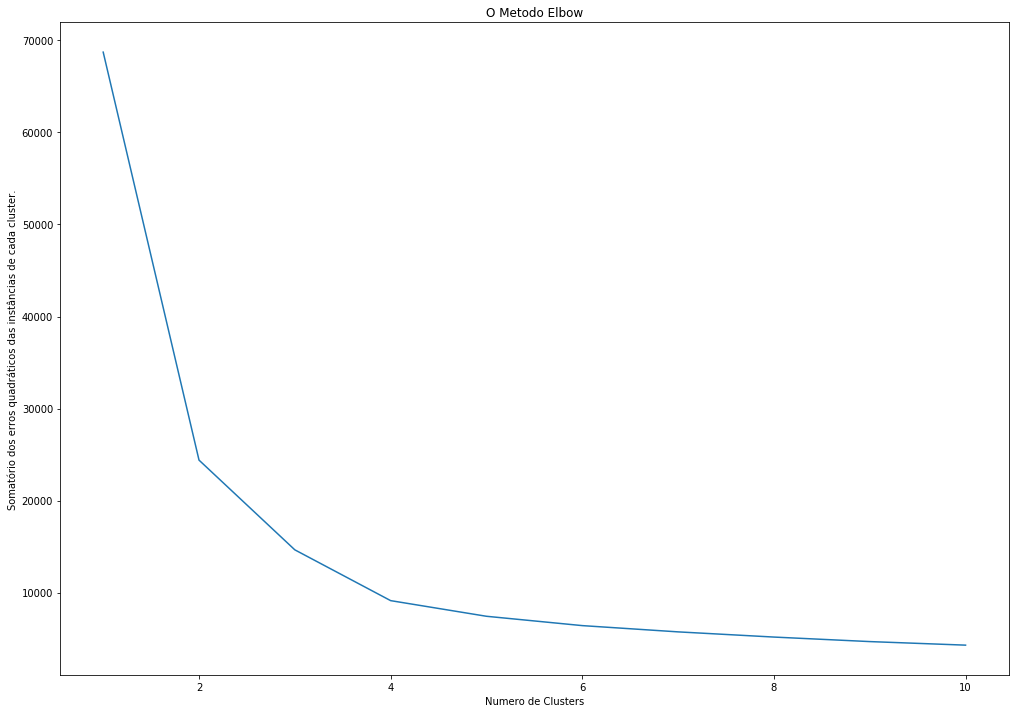

In [49]:
plt.rcParams['figure.figsize'] = (17,12)
plt.plot(range(1, 11), lista)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('Somatório dos erros quadráticos das instâncias de cada cluster.')
plt.show()

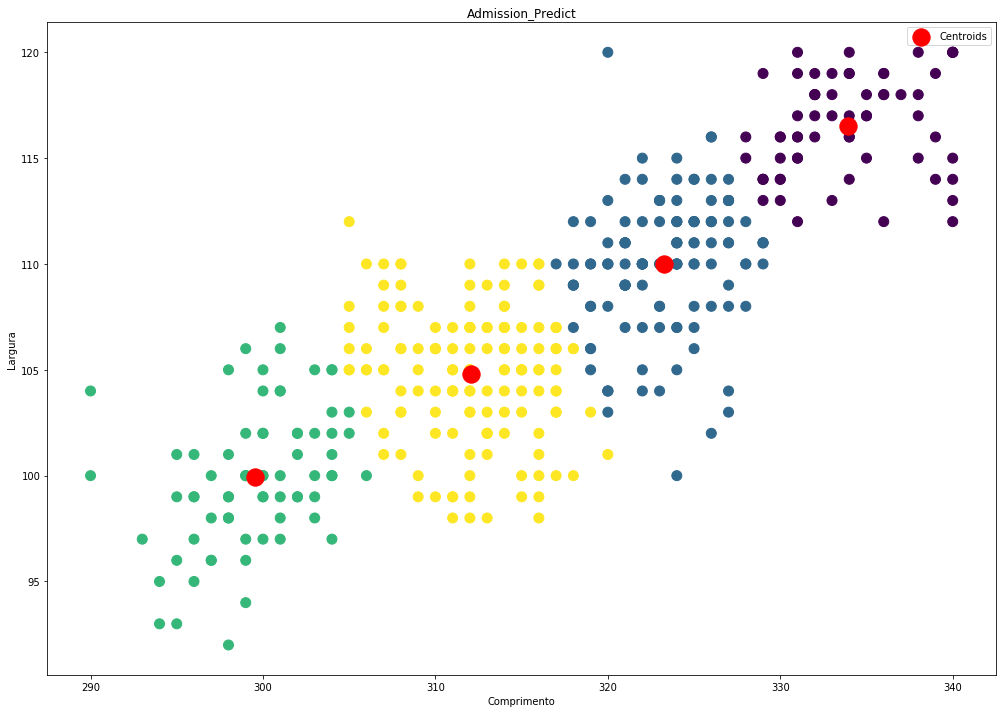

In [58]:
kmeans = KMeans(n_clusters = 4, init = 'random')
kmeans.fit(X)

plt.scatter(X[:, 0], X[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Admission_Predict')
plt.xlabel('Comprimento')
plt.ylabel('Largura')
plt.legend()

plt.show()